# Aula 7 (18/11/2022)
### Nome: Adriel Bombonato Guidini Godinho
### RA: 191011631

## Detecção de padrões

---

# Tutoriais Opencv: 
## Understanding Features
É de interesse entender fazermos para que o computador consiga facilmente identificar, localizar e comparar pontos de interesse e características importantes de imagens. Isso permite operações como *image stitching*.

Uma maneira heurística de procurar padrões é identificar locais que geram a maior mudança possível ao ser deslocado em uma pequena quantididade.



## Harris Corner Detection
![Harris_function](imgs_theory\theory1.png)

A detecção de bordas de Harris toma em conta variações de intensidade para um deslocamento de posição em todas as direções possíveis.

Ao maximizar a função E(u,v), detectamos bordas.

![Final_Harris_function](imgs_theory\theory2.png)

É feito então uma pontuação para determinar a acertividade de um candidato a canto ser aceito ou não. Isso é considerado a parte principal da função de Harris.

![Score](imgs_theory\theory3.png)

cantos podem ser achados nos máximos locais desse mapa gerado.

- **|R| pequeno**: região lisa
- **R negativo**: presença de borda 
- **R grande**: região é um canto

![Rs](https://docs.opencv.org/4.x/harris_region.jpg)

In [256]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [257]:
img = cv2.imread('images\\backrooms.jpg')

# Imagem precisa ser Grayscale e float32
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray = np.float32(gray)

# cv2.cornerHarris(imagem, 
#                tamanho_da_vizinhança , 
#                parâmetro_para_sobel, 
#                parâmetro_livre , 
#                método_extrapolação_pixels)	
dst = cv2.cornerHarris(gray,2,3,0.1)

# Dilatar para marcar os pontos vermelhos de bordas
dst = cv2.dilate(dst,None)

# Threshold for an optimal value, it may vary depending on the image.
img[dst>0.01*dst.max()]=[0,0,255]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


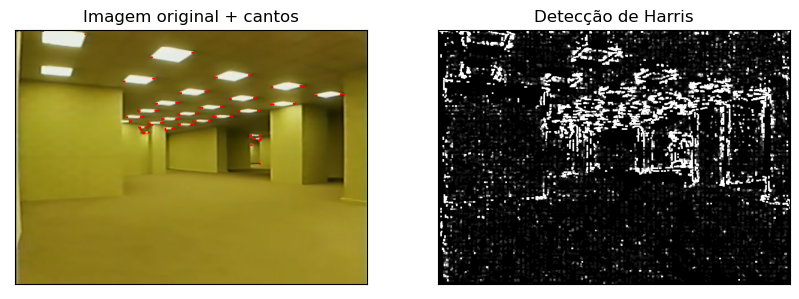

In [258]:
# Plotar todos os resultados
titles = ['Imagem original + cantos', 'Detecção de Harris']
images = [img, dst]
plt.figure(figsize=(10,10))
for i in range(2):
    images[i] = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)
    plt.subplot(2,2,i+1),plt.imshow(images[i])
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

### Otimizar o resultado com SubPixel Accuracy
Através de vários pixel concetrados em um canto ou borda, achar o centróide deles, para refiná-los. Para a iteração de refinamento após um certo número de iterações ou até atingir um nível de acurácia.

In [259]:
img2 = cv2.imread('images\\backrooms.jpg')

# Imagem precisa ser Grayscale e float32
gray2 = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
gray2 = np.float32(gray2)

# cv2.cornerHarris(imagem, 
#                tamanho_da_vizinhança , 
#                parâmetro_para_sobel, 
#                parâmetro_livre , 
#                método_extrapolação_pixels)	
dst2 = cv2.cornerHarris(gray,2,3,0.1)
kernel = np.ones((3,3),np.uint8)
dst2 = cv2.dilate(dst2,kernel) 
ret, dst2 = cv2.threshold(dst2,0.01*dst2.max(),255,0)
dst2 = np.uint8(dst2)

# achar centroids
ret, labels, stats, centroids = cv2.connectedComponentsWithStats(dst2)

# definir critério para parar e refinar os cantos
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.001)
corners = cv2.cornerSubPix(gray,np.float32(centroids),(5,5),(-1,-1),criteria)

# Desenhar
res = np.hstack((centroids,corners))
res = np.int0(res)
img2[dst2>0.01*dst2.max()]=[0,0,255]
img2[res[:,3],res[:,2]] = [0,255,0]
cv2.destroyAllWindows()

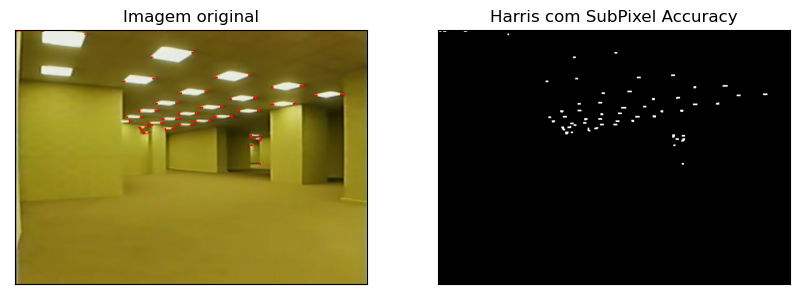

In [260]:
# Plotar todos os resultados
titles = ['Imagem original', 'Harris com SubPixel Accuracy']
images = [img2, dst2]
plt.figure(figsize=(10,10))
for i in range(2):
    images[i] = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)
    plt.subplot(2,2,i+1),plt.imshow(images[i])
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

## Shi-Tomasi Corner Detector & Good Features to Track

No método de Shi-Tomasi, é proposto uma nova de pontuação, como descrita abaixo.

![New_score](imgs_theory\theory4.png)

Se R for maior que um threshold, será considerado uma borda. Plotando o espaço de λ1−λ2, teremos:

![Espaço_shi](https://docs.opencv.org/4.x/shitomasi_space.png)

Apenas na região verde é considerada uma borda.

A função `cv.goodFeaturesToTrack()` permite achar as N bordas mais fortes na imagem pelo método de Shi-Tomasi, ou de Harris caso especificado.

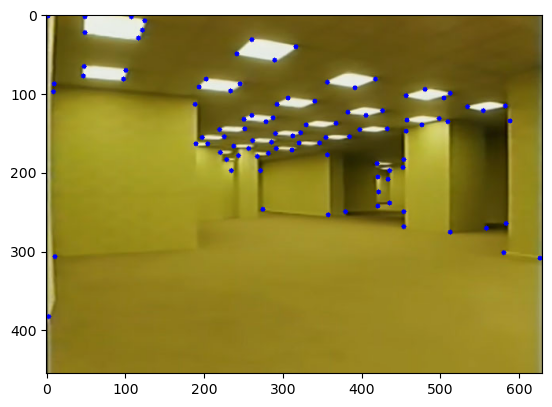

(<matplotlib.image.AxesImage at 0x19c3c6af850>, None)

In [261]:
# Tentando achar as 100 bordas mais fortes

img = cv2.imread('images\\backrooms.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
corners = cv2.goodFeaturesToTrack(gray,100,0.01,10)
corners = np.int0(corners)
for i in corners:
    x,y = i.ravel()
    cv2.circle(img,(x,y),3,255,-1)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img),plt.show()